In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

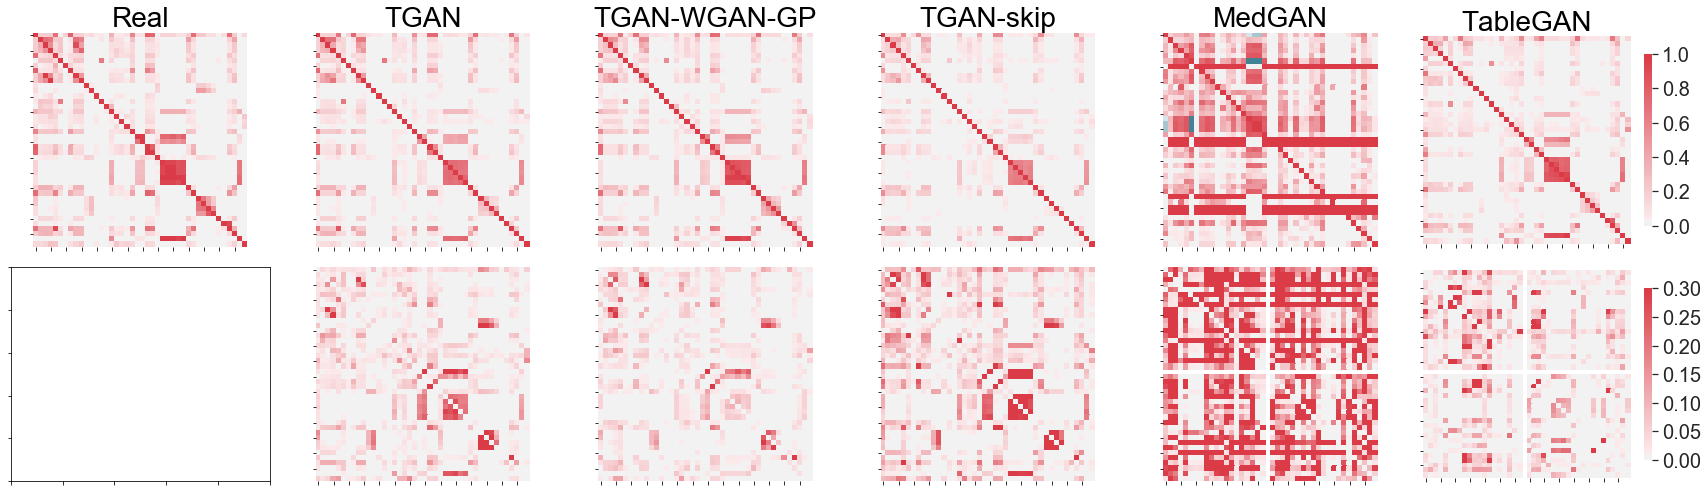

In [9]:
evaluators = [tgan_evaluator, wgan_evaluator, skip_evaluator, medgan_evaluator, tablegan_evaluator]
plot_correlation_comparison(evaluators, annot=False)
plt.savefig('../Master-Thesis/images/results/census_correlation.png')

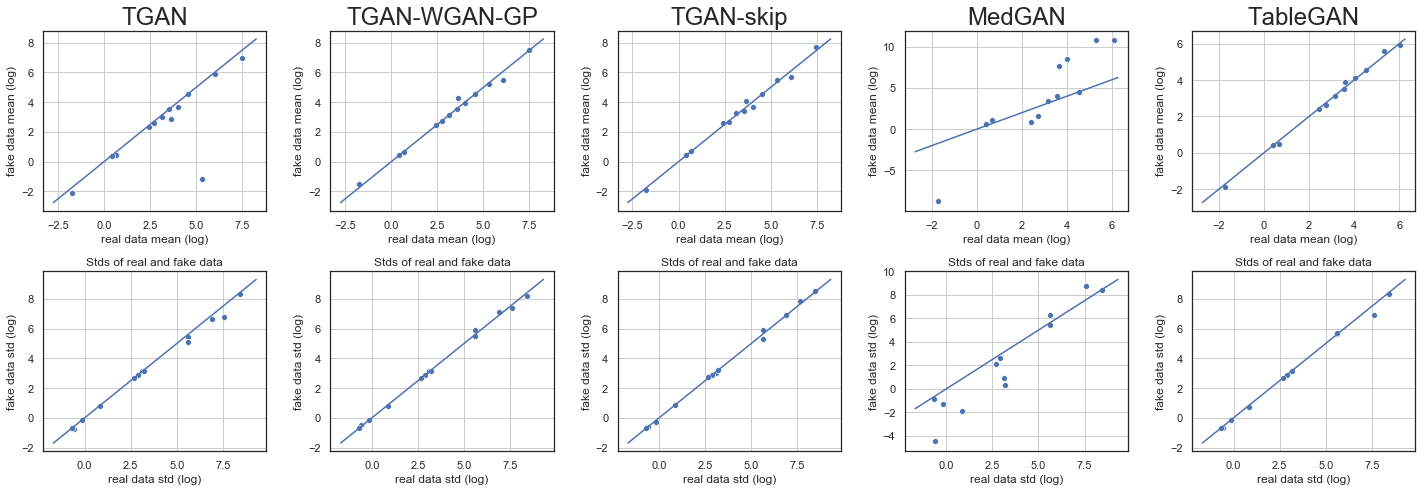

In [26]:
plot_mean_std_comparison(evaluators)
plt.savefig('../Master-Thesis/images/results/census_mean_std.png')

# Census

## Original TGAN

In [26]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan.csv', real_sep=',')
tgan_evaluator = DataEvaluator(real, fake)

In [20]:
tgan_evaluator.pca_correlation()

0.5186765413172902

In [32]:
real, fake = tgan_evaluator.convert_numerical()

In [33]:
pca_r = PCA(n_components=2)
real_trans = pca_r.fit_transform(real)
# pca_f = PCA(n_components=5)
fake_trans = pca_r.transform(fake)

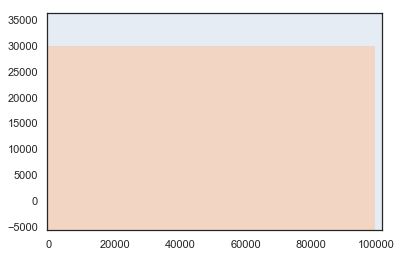

In [38]:
real_trans, fake_trans = real_trans[:1000], fake_trans[:1000]
ax = sns.kdeplot(real_trans[:, 0], real_trans[:, 1], shade=True)
ax = sns.kdeplot(fake_trans[:, 0], fake_trans[:, 1], shade=True, ax=ax)

C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


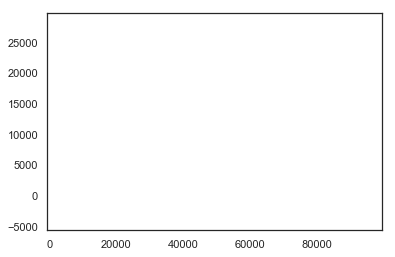

In [45]:
sns.kdeplot(fake_trans[:, 0], fake_trans[:, 1])

In [9]:
tgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9511 0.9425
real_data_RandomForestClassifier_F1 0.9503 0.9406
real_data_DecisionTreeClassifier_F1 0.9339 0.9032
real_data_MLPClassifier_F1          0.9443 0.9385
fake_data_LogisticRegression_F1     0.9556 0.9595
fake_data_RandomForestClassifier_F1 0.9567 0.9580
fake_data_DecisionTreeClassifier_F1 0.9314 0.9321
fake_data_MLPClassifier_F1          0.9367 0.9567

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.0674
Column Correlation distance MAE      0.0295
Duplicate rows between sets      9,291.0000
nearest neighbor mean                2.3953
nearest neighbor std                 1.4509

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.8963
Correlation column correlations                 0.9574
Mean Correl

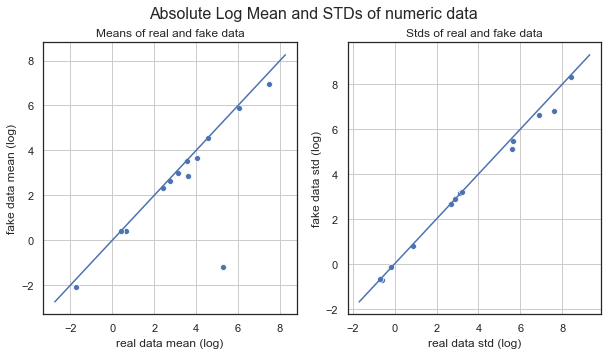

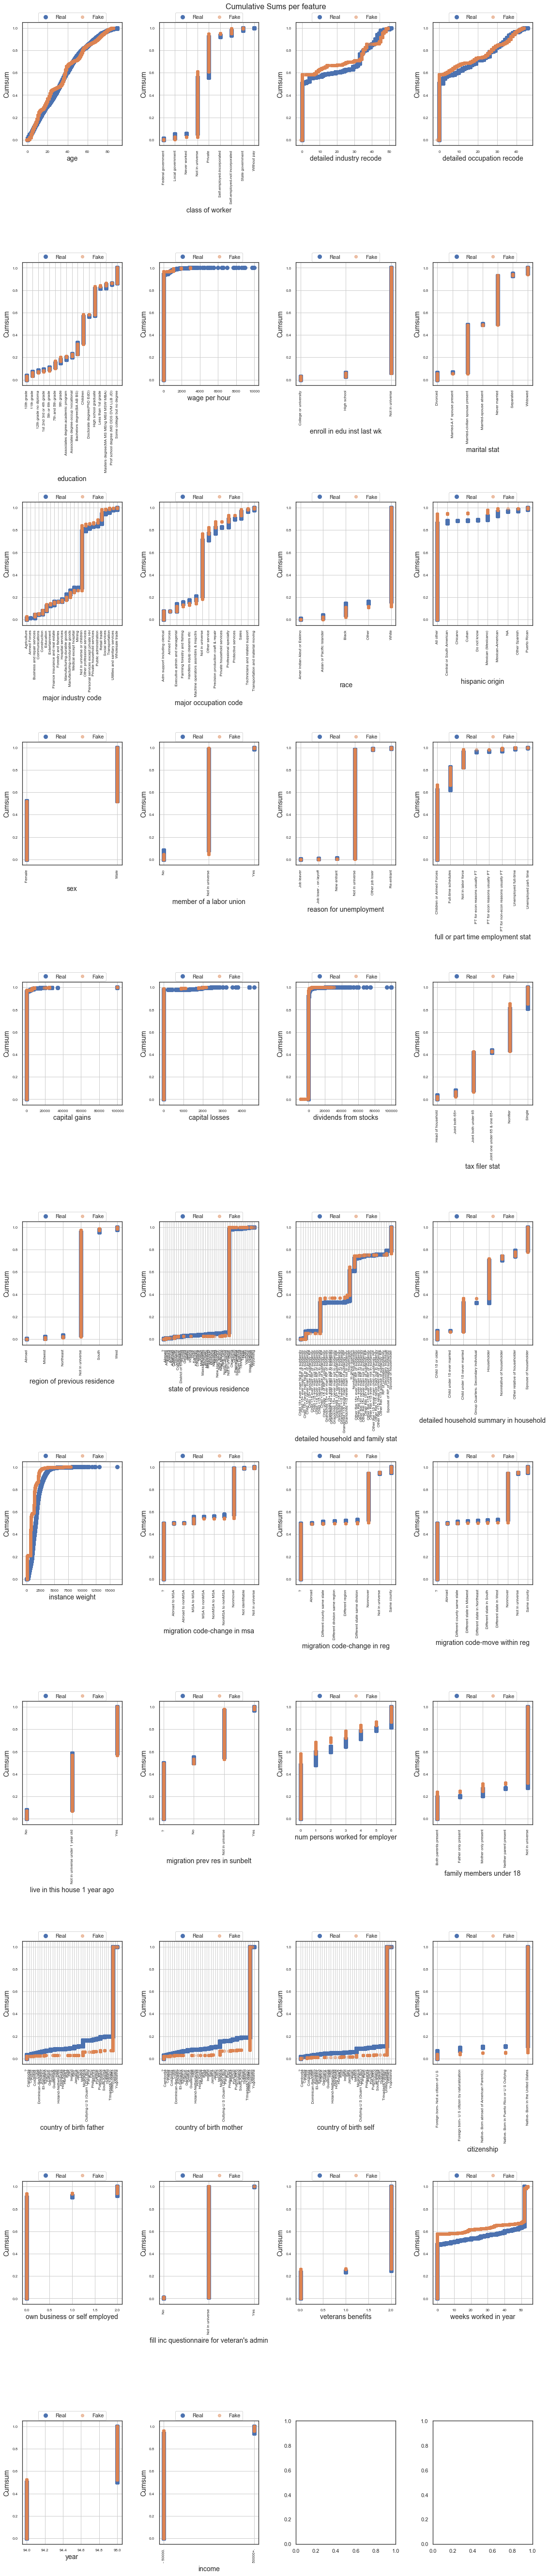

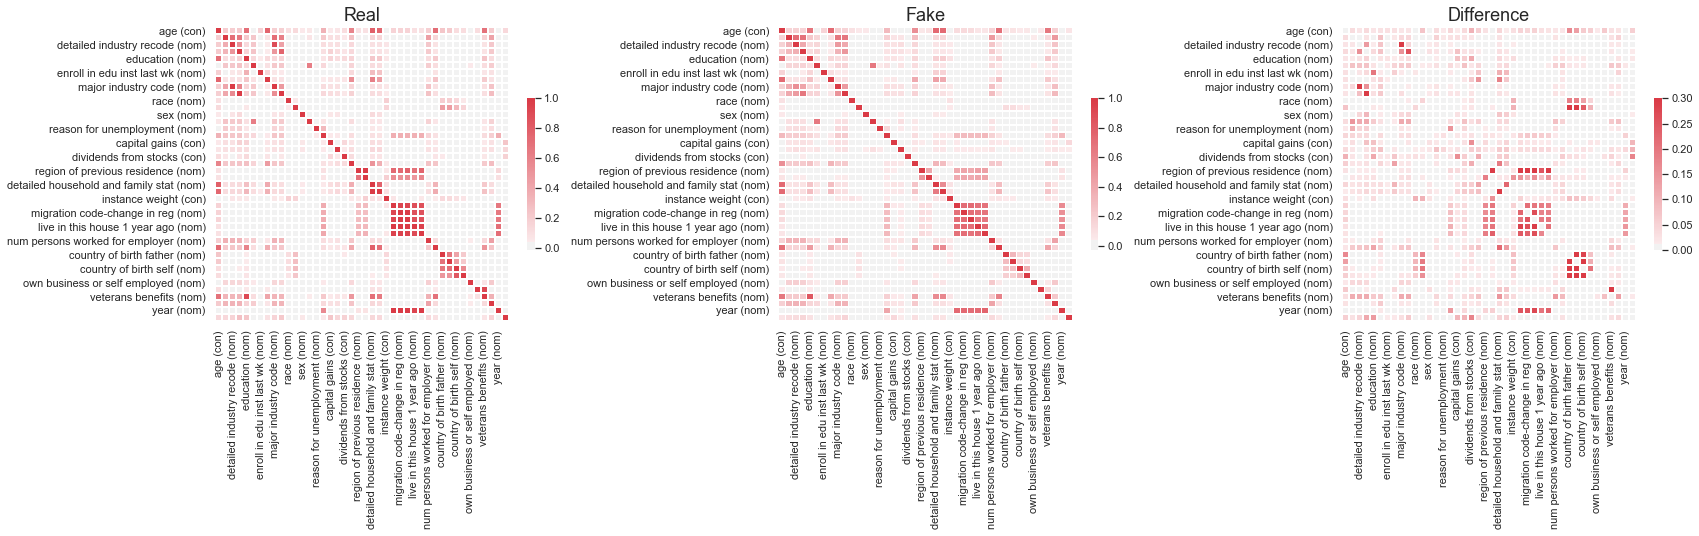

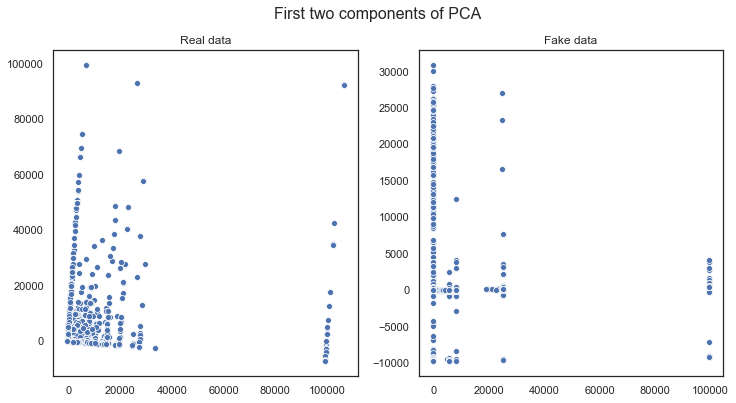

In [15]:
tgan_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [5]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-wgan-gp.csv', real_sep=',')
wgan_evaluator = DataEvaluator(real, fake)

In [11]:
wgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9473 0.9412
real_data_RandomForestClassifier_F1 0.9489 0.9388
real_data_DecisionTreeClassifier_F1 0.9297 0.8999
real_data_MLPClassifier_F1          0.9489 0.9341
fake_data_LogisticRegression_F1     0.9301 0.9302
fake_data_RandomForestClassifier_F1 0.9292 0.9305
fake_data_DecisionTreeClassifier_F1 0.9056 0.9028
fake_data_MLPClassifier_F1          0.9289 0.9298

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.0488
Column Correlation distance MAE      0.0218
Duplicate rows between sets      2,322.0000
nearest neighbor mean                2.6916
nearest neighbor std                 1.2453

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9481
Correlation column correlations                 0.9769
Mean Correl

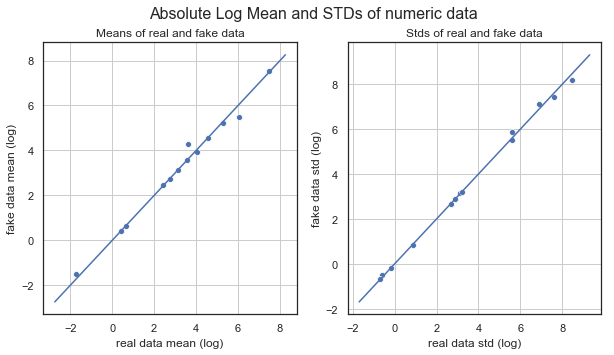

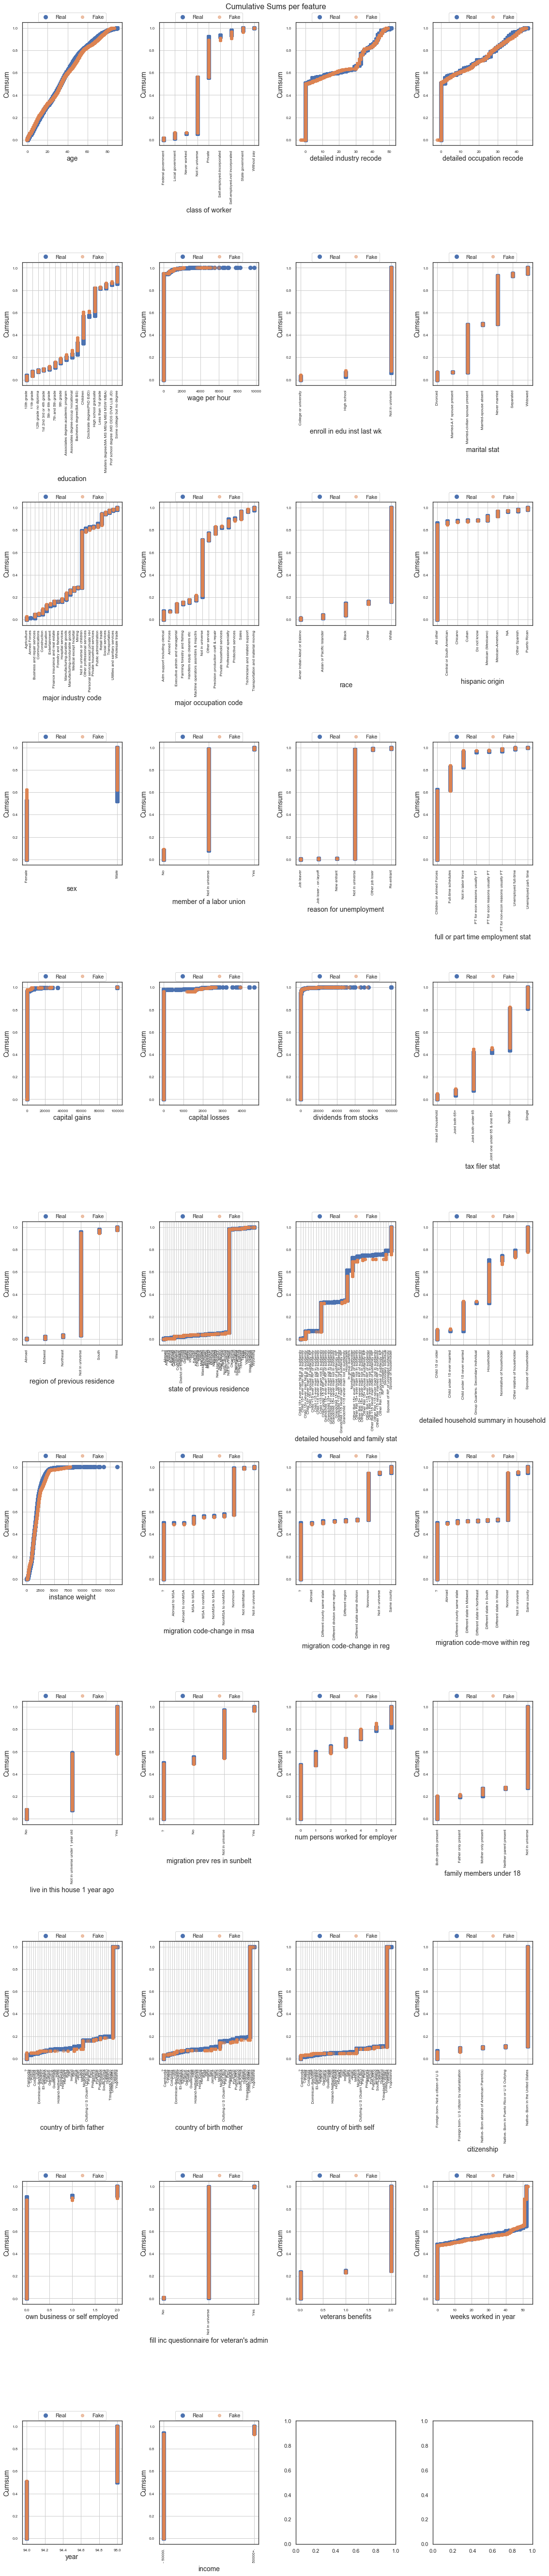

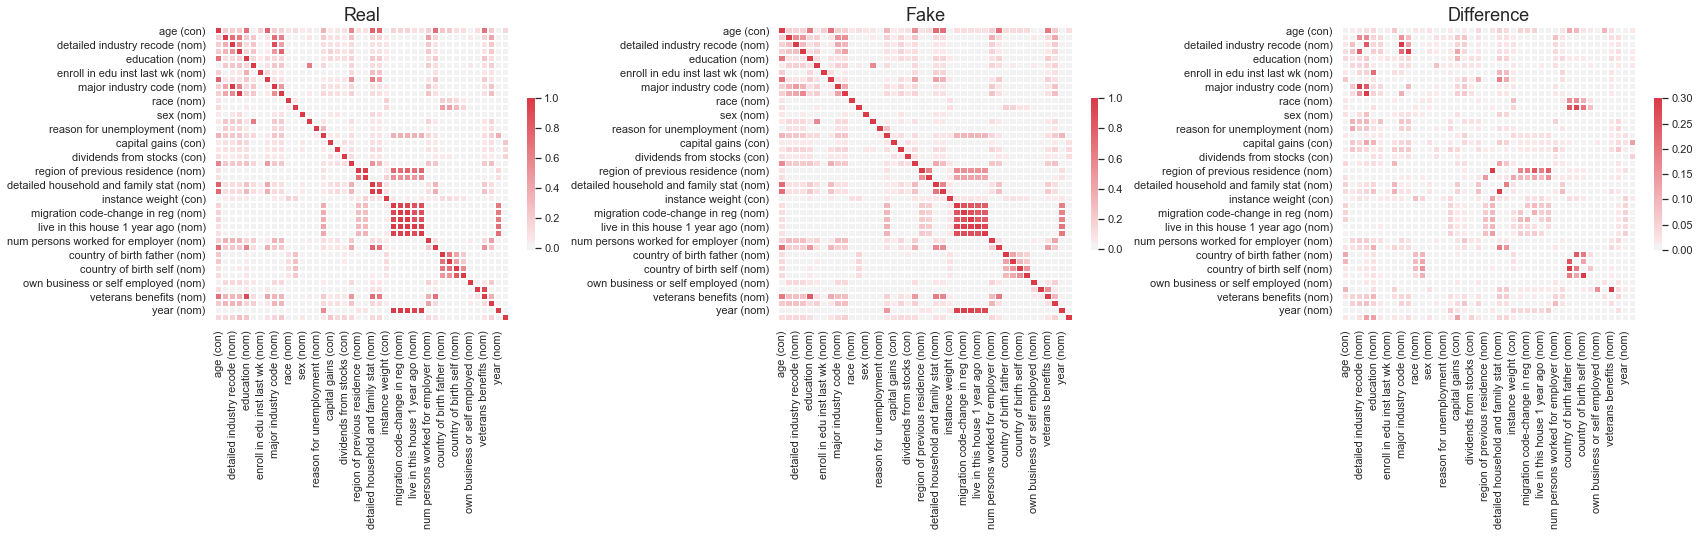

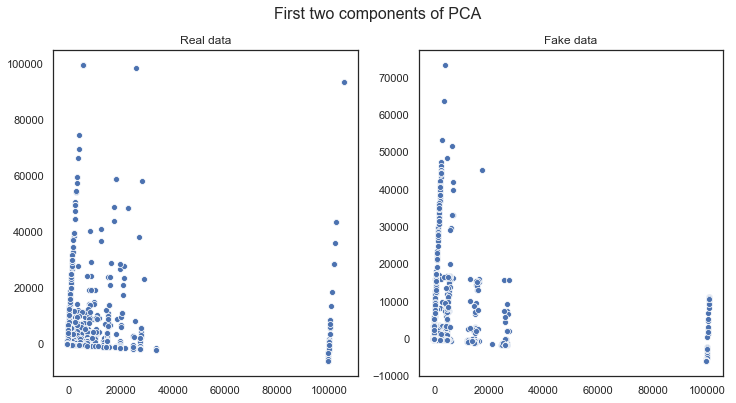

In [16]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [6]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-skip-connections-columns-corrected.csv', real_sep=',', fake_sep=';')
skip_evaluator = DataEvaluator(real, fake)

In [13]:
skip_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9513 0.9401
real_data_RandomForestClassifier_F1 0.9508 0.9388
real_data_DecisionTreeClassifier_F1 0.9341 0.8870
real_data_MLPClassifier_F1          0.9533 0.9384
fake_data_LogisticRegression_F1     0.9265 0.9294
fake_data_RandomForestClassifier_F1 0.9283 0.9294
fake_data_DecisionTreeClassifier_F1 0.8902 0.8809
fake_data_MLPClassifier_F1          0.9155 0.9290

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.1057
Column Correlation distance MAE      0.0479
Duplicate rows between sets      2,598.0000
nearest neighbor mean                2.8334
nearest neighbor std                 1.2862

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9630
Correlation column correlations                 0.9051
Mean Correl

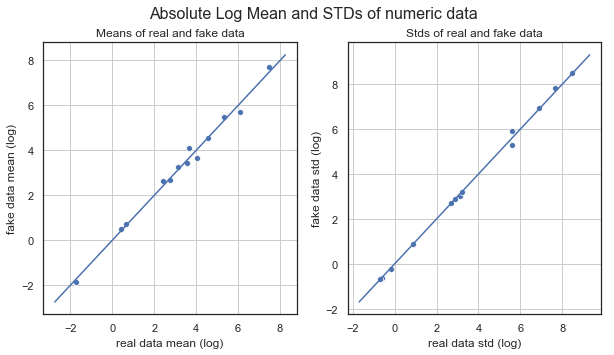

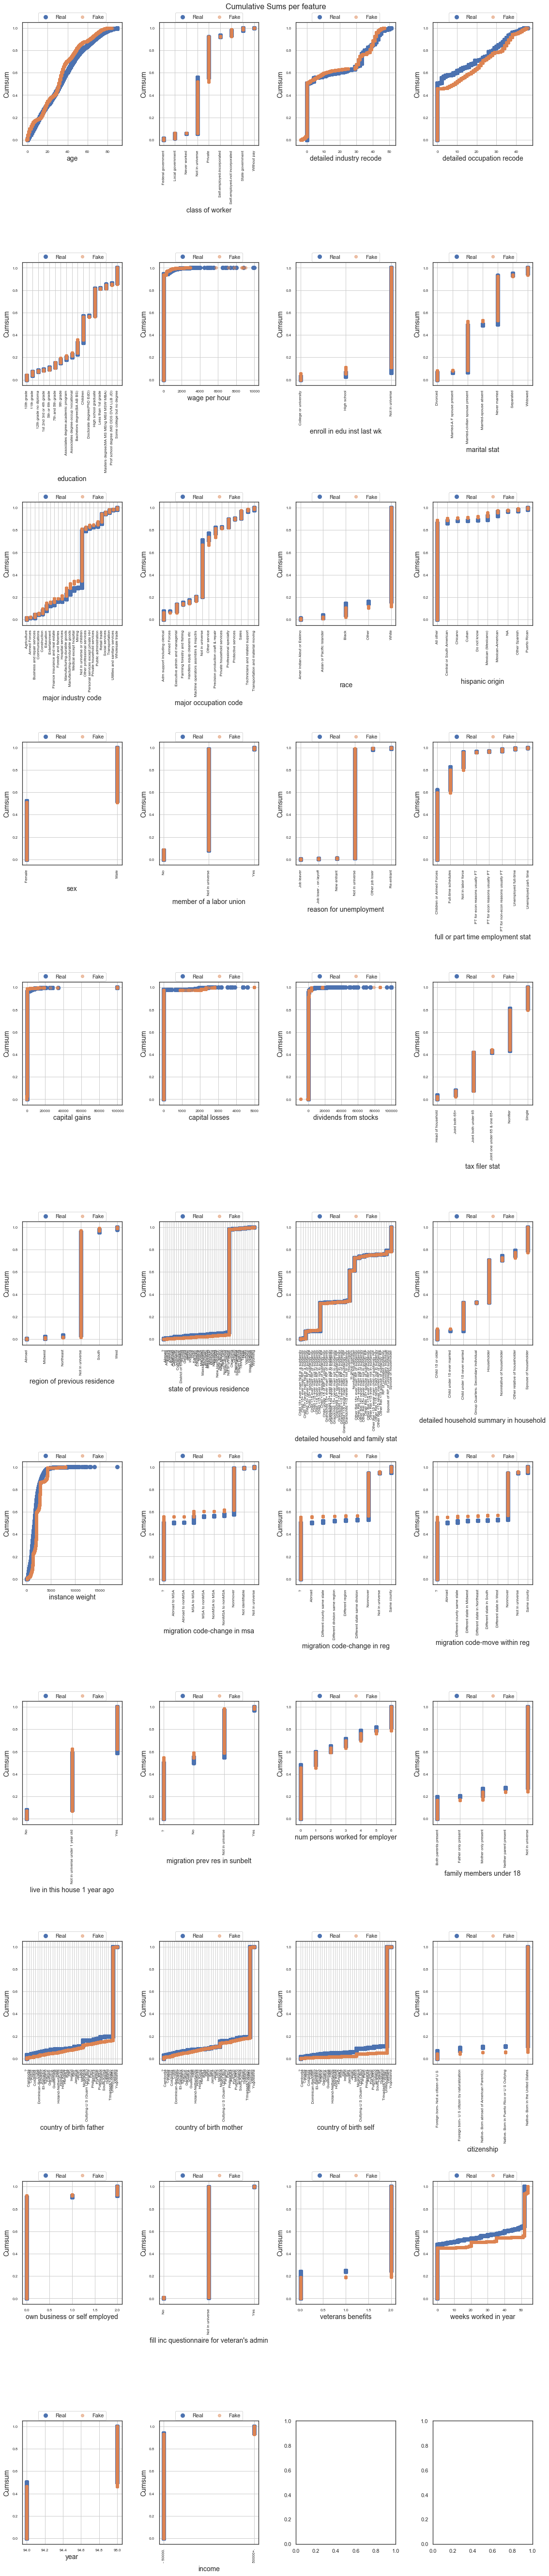

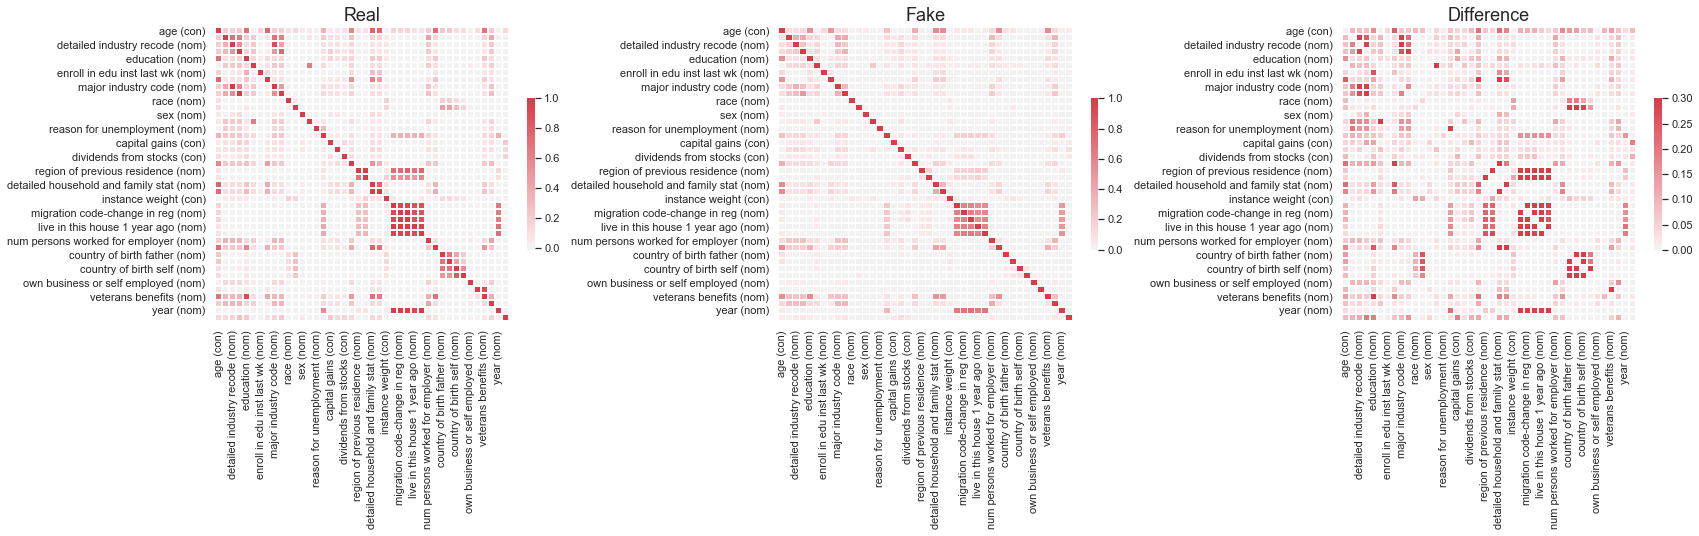

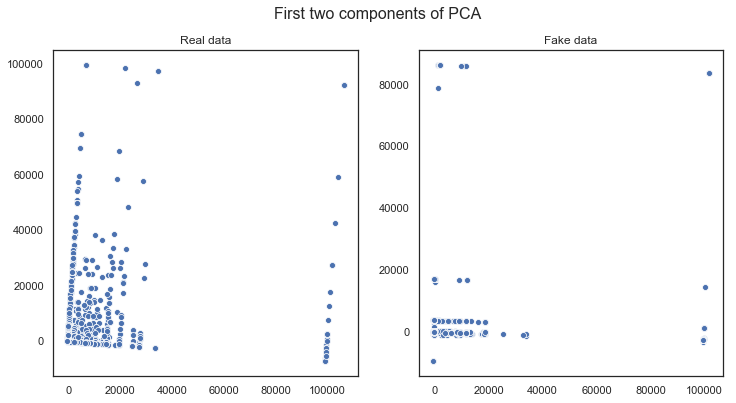

In [17]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [21]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_medgan_100.csv', real_sep=',')
real['income'] = real['income'].apply(lambda x: x[:-1].strip())
columns = real.select_dtypes(include=['object']).columns.tolist()
real[columns] = real[columns].apply(lambda x: x.str.strip())
medgan_evaluator = DataEvaluator(real, fake)

In [22]:
medgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9468 0.9281
real_data_RandomForestClassifier_F1 0.9468 0.9349
real_data_DecisionTreeClassifier_F1 0.9308 0.6077
real_data_MLPClassifier_F1          0.9372 0.9341
fake_data_LogisticRegression_F1     0.0013 0.9998
fake_data_RandomForestClassifier_F1 0.9711 0.9994
fake_data_DecisionTreeClassifier_F1 0.8093 0.9992
fake_data_MLPClassifier_F1          0.0013 0.9987

Miscellaneous results:
                                      Result
Column Correlation Distance RMSE      0.4342
Column Correlation distance MAE       0.2801
Duplicate rows between sets      47,136.0000
nearest neighbor mean                 5.5150
nearest neighbor std                  1.1952

Results:
Number of duplicate rows is ignored for total score.
                                                  Result
basic statistics                                  0.3102
Correlation column correla

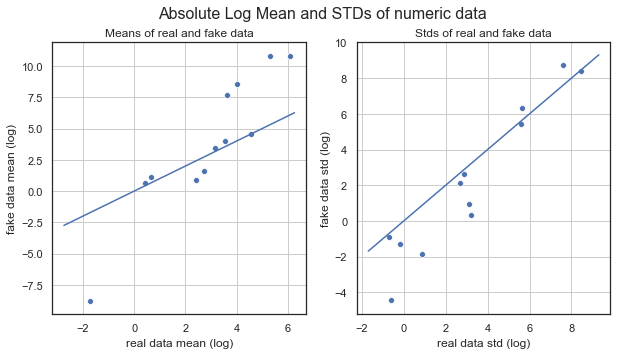

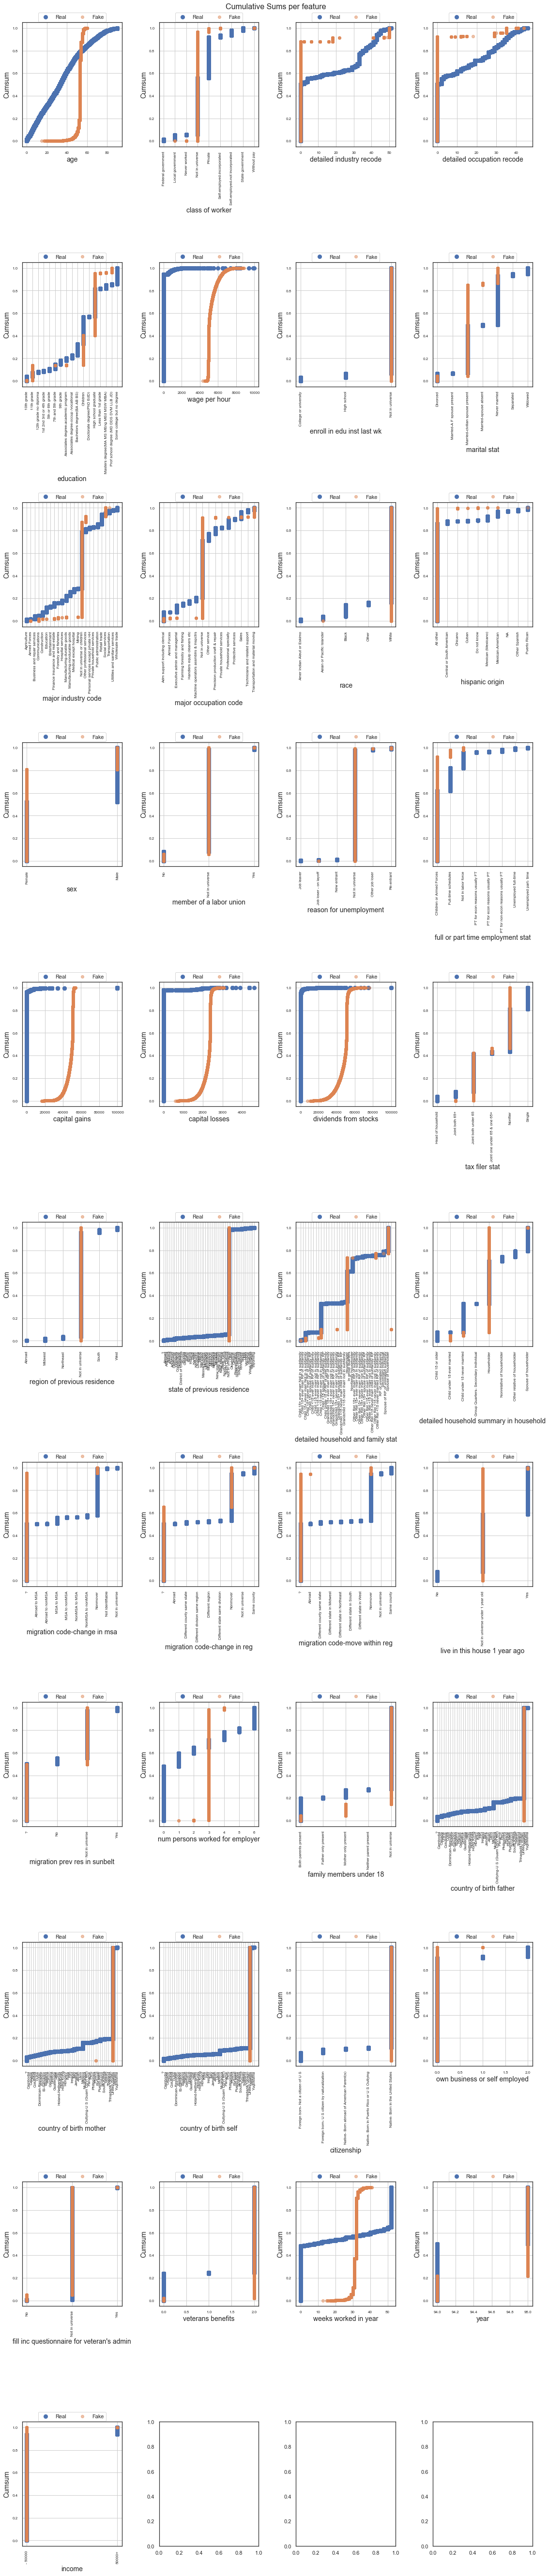

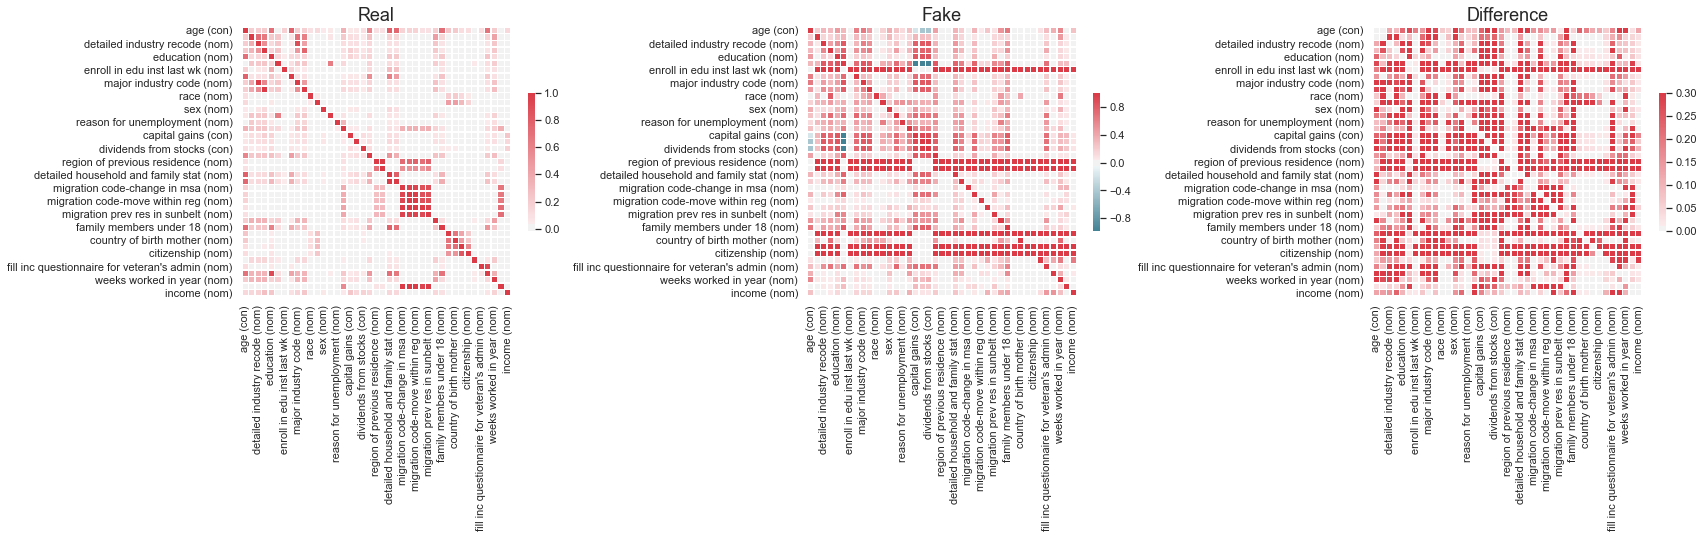

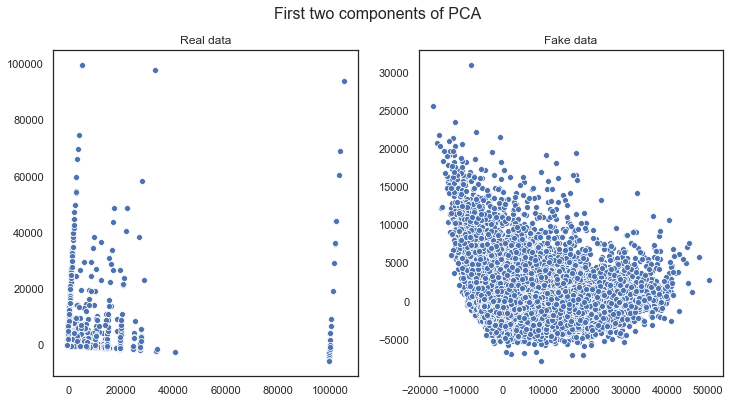

In [12]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [4]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_tablegan_100.csv', real_sep=',')
real['income'] = real['income'].apply(lambda x: x[:-1].strip())
fake.loc[fake['hispanic origin'].isna(), 'hispanic origin'] = 'NA'
columns = real.select_dtypes(include=['object']).columns.tolist()
real[columns] = real[columns].apply(lambda x: x.str.strip())
tablegan_evaluator = DataEvaluator(real, fake, n_samples=100000)

In [17]:
tablegan_evaluator.pca_correlation()

0.9946618717587166

In [5]:
tablegan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9502 0.9295
real_data_RandomForestClassifier_F1 0.9478 0.9372
real_data_DecisionTreeClassifier_F1 0.9325 0.9260
real_data_MLPClassifier_F1          0.9424 0.9293
fake_data_LogisticRegression_F1     0.9305 0.9644
fake_data_RandomForestClassifier_F1 0.9299 0.9654
fake_data_DecisionTreeClassifier_F1 0.9214 0.9624
fake_data_MLPClassifier_F1          0.9341 0.9688

Miscellaneous results:
                                      Result
Column Correlation Distance RMSE      0.0866
Column Correlation distance MAE       0.0365
Duplicate rows between sets      28,174.0000
nearest neighbor mean                 2.8656
nearest neighbor std                  1.3224

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9704
Correlation column correlation

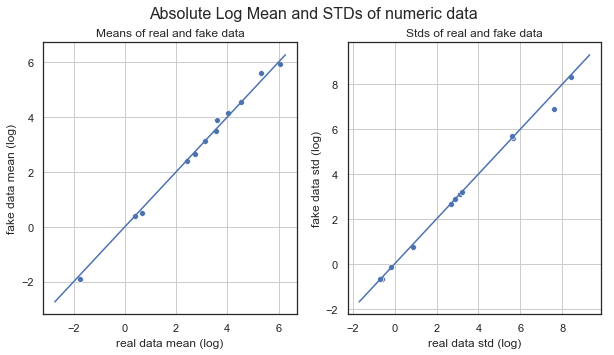

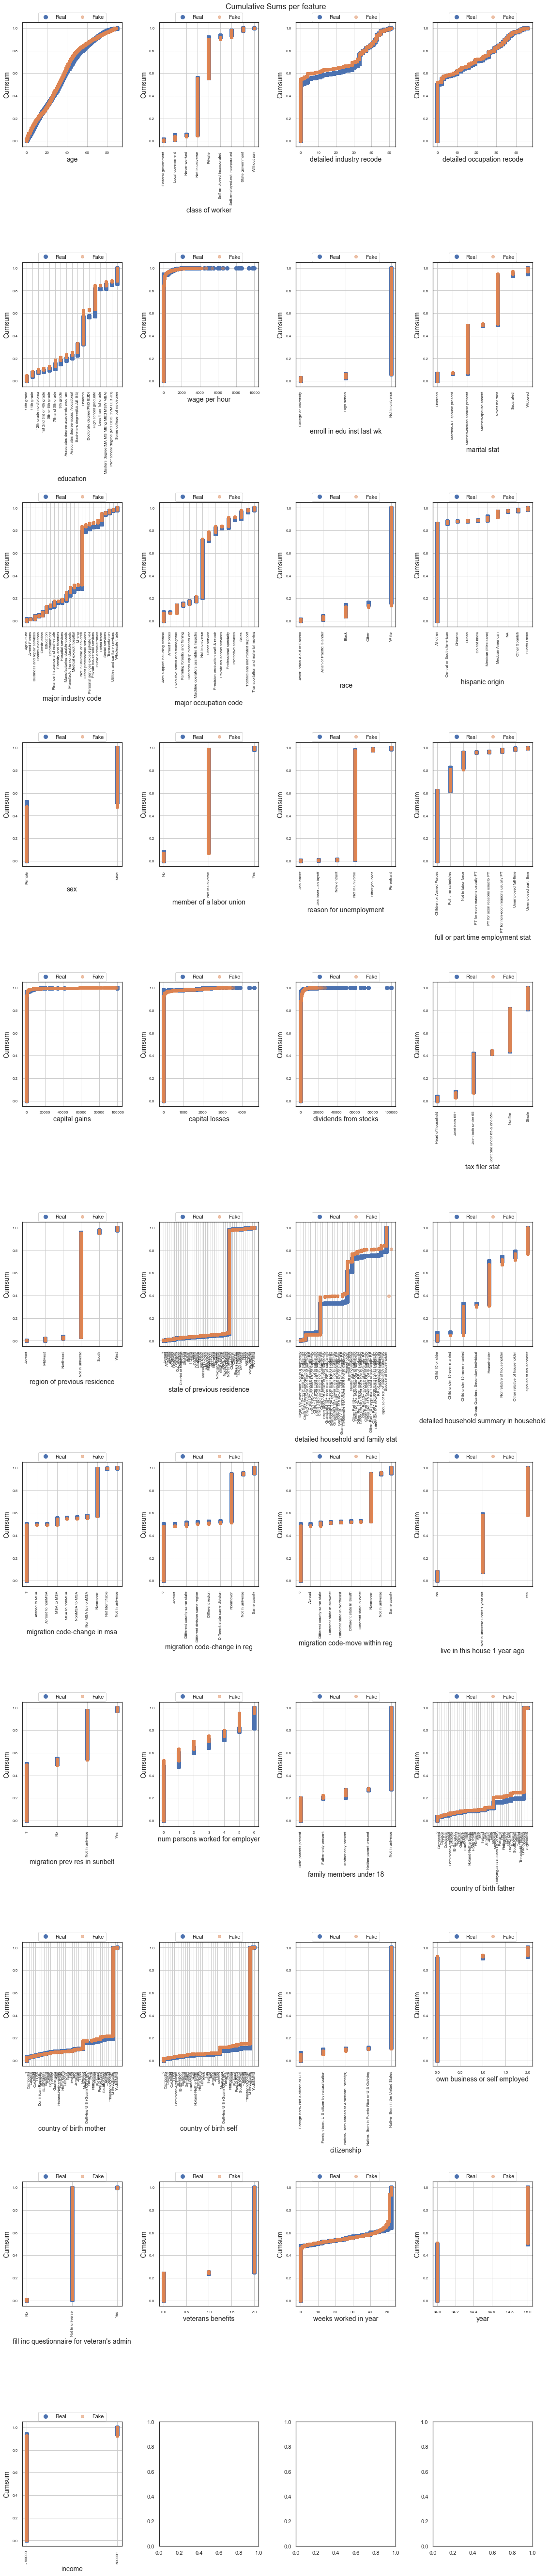

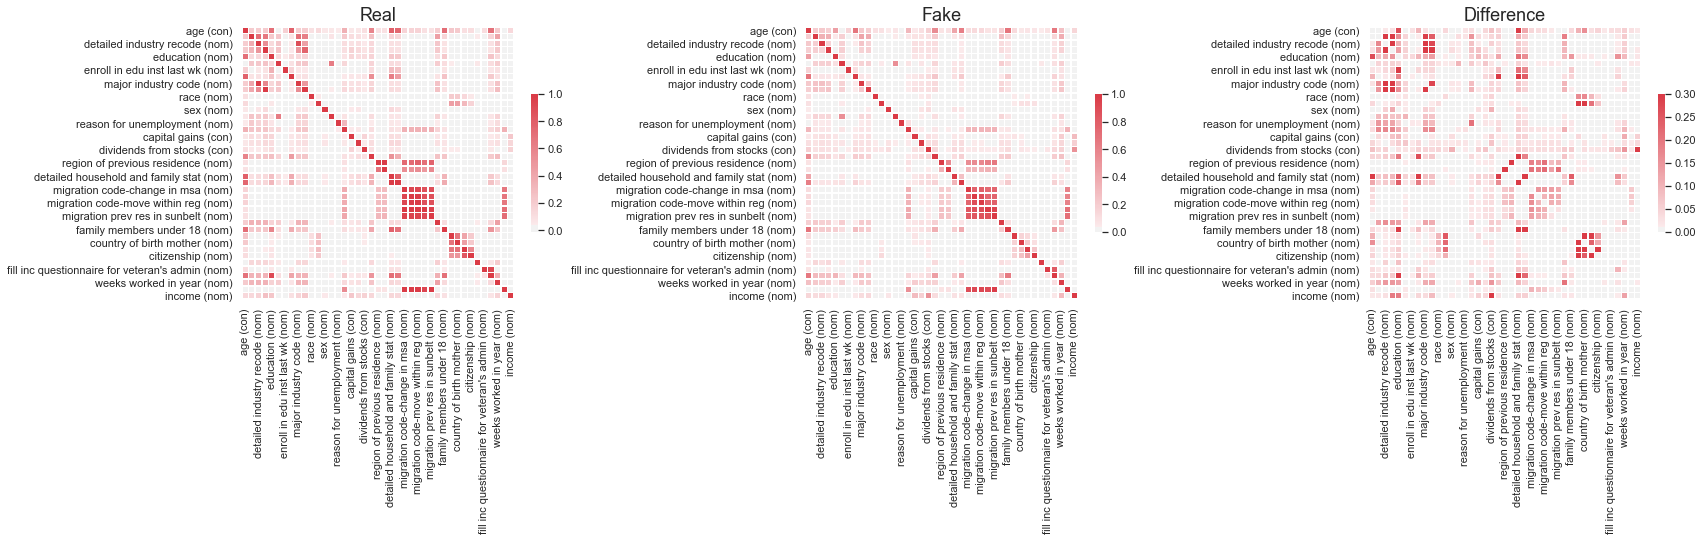

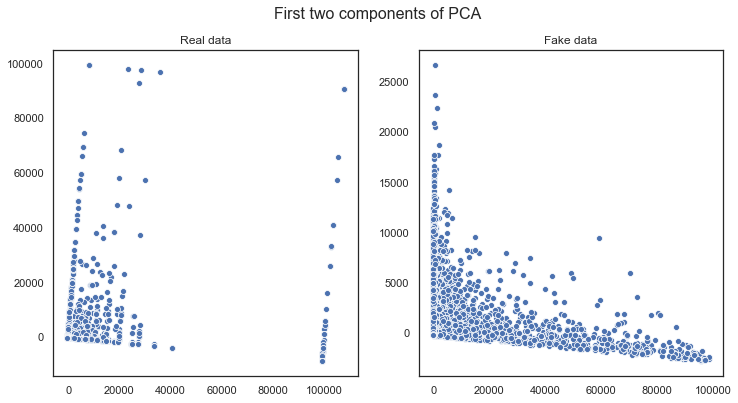

In [14]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [27]:
target_col = 'income'
x = numerical_encoding(tgan_evaluator.fake.drop([target_col], axis=1), nominal_columns=tgan_evaluator.categorical_columns)

IndexError: index 361 is out of bounds for axis 0 with size 349

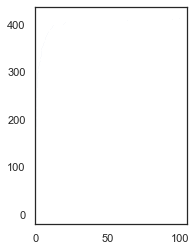

In [30]:
feature_importance = tgan_evaluator.r_estimators[2].feature_importances_
# print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
# print(column_names)
# print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

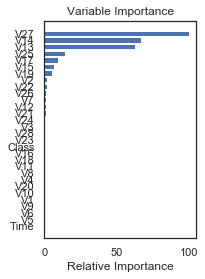

In [72]:
feature_importance = tgan_org_evaluator.r_estimators[0].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()